# Support Vector Machines 
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired me to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**The overall goal is to use the wine dataset to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,white


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=6497, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [8]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [9]:
df['type'].unique()

array(['red', 'white'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

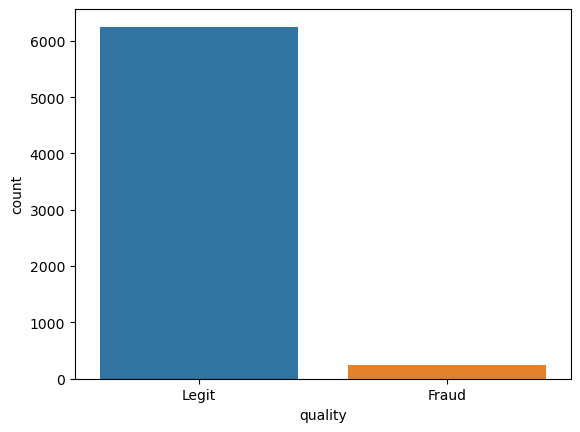

In [10]:
sns.countplot(data=df,x='quality')

In [11]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

In [12]:
# Disproportionate number of Legit with regards to Fraud cases
# This is an unbalanced dataset

<Axes: xlabel='quality', ylabel='count'>

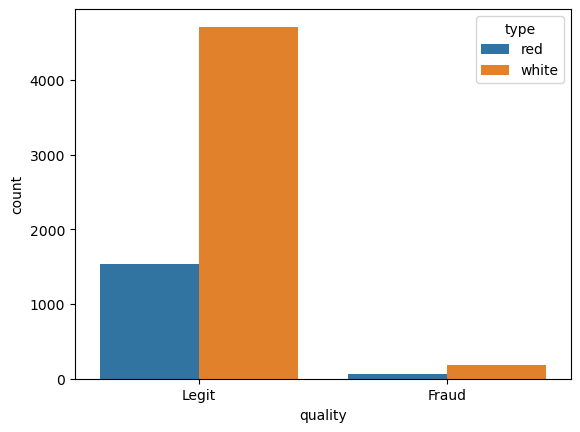

In [13]:
sns.countplot(data=df,x='quality',hue='type')

**I want to know what percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [14]:
df[(df['type']=='red') & (df['quality']=='Fraud')]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,Fraud,red
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,Fraud,red
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,Fraud,red
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,Fraud,red
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,Fraud,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,Fraud,red
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,Fraud,red
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,Fraud,red
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,Fraud,red


In [15]:
len(df[(df['type']=='red') & (df['quality']=='Fraud')])

63

In [16]:
len (df[df['type']=='red'])

1599

In [17]:
# Percentage of red wine that are fraud

len(df[(df['type']=='red') & (df['quality']=='Fraud')])/len (df[df['type']=='red']) * 100

3.9399624765478425

In [18]:
# Percentage of white wine that are fraud

len(df[(df['type']=='white') & (df['quality']=='Fraud')])/len (df[df['type']=='white']) * 100

3.7362188648427925

In [19]:
# Pretty much same percentage of Frauds for both type of wines.

In [20]:
# Calculating correlation between various features and 'Quality' column.

In [21]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [22]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white,0


In [23]:
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046


In [24]:
df.corr(numeric_only=True)['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

In [25]:
df.corr(numeric_only=True)['Fraud'][:-1].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'free sulfur dioxide'),
  Text(1, 0, 'citric acid'),
  Text(2, 0, 'alcohol'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'total sulfur dioxide'),
  Text(5, 0, 'sulphates'),
  Text(6, 0, 'density'),
  Text(7, 0, 'pH'),
  Text(8, 0, 'fixed acidity'),
  Text(9, 0, 'chlorides'),
  Text(10, 0, 'volatile acidity')])

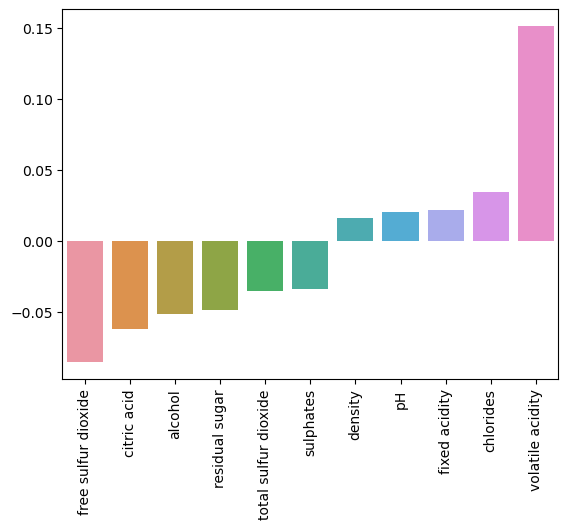

In [26]:
sns.barplot(y=df.corr(numeric_only=True)['Fraud'][:-1].sort_values().values,x=df.corr(numeric_only=True)['Fraud'][:-1].sort_values().index)
plt.xticks(rotation=90)

<Axes: >

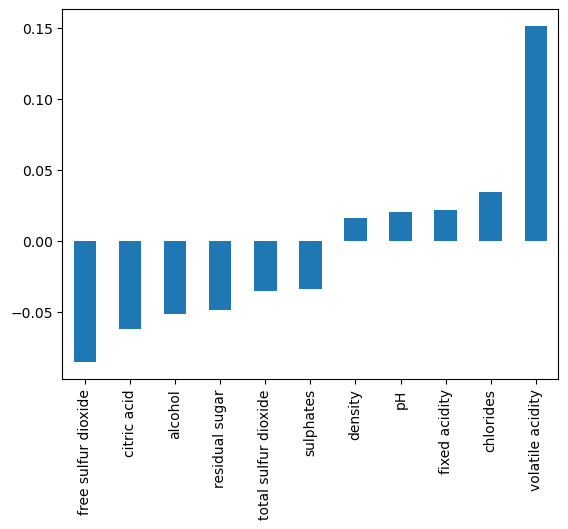

In [27]:
# Easier way to plot

df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')

In [28]:
# Creating clustermap of correlations

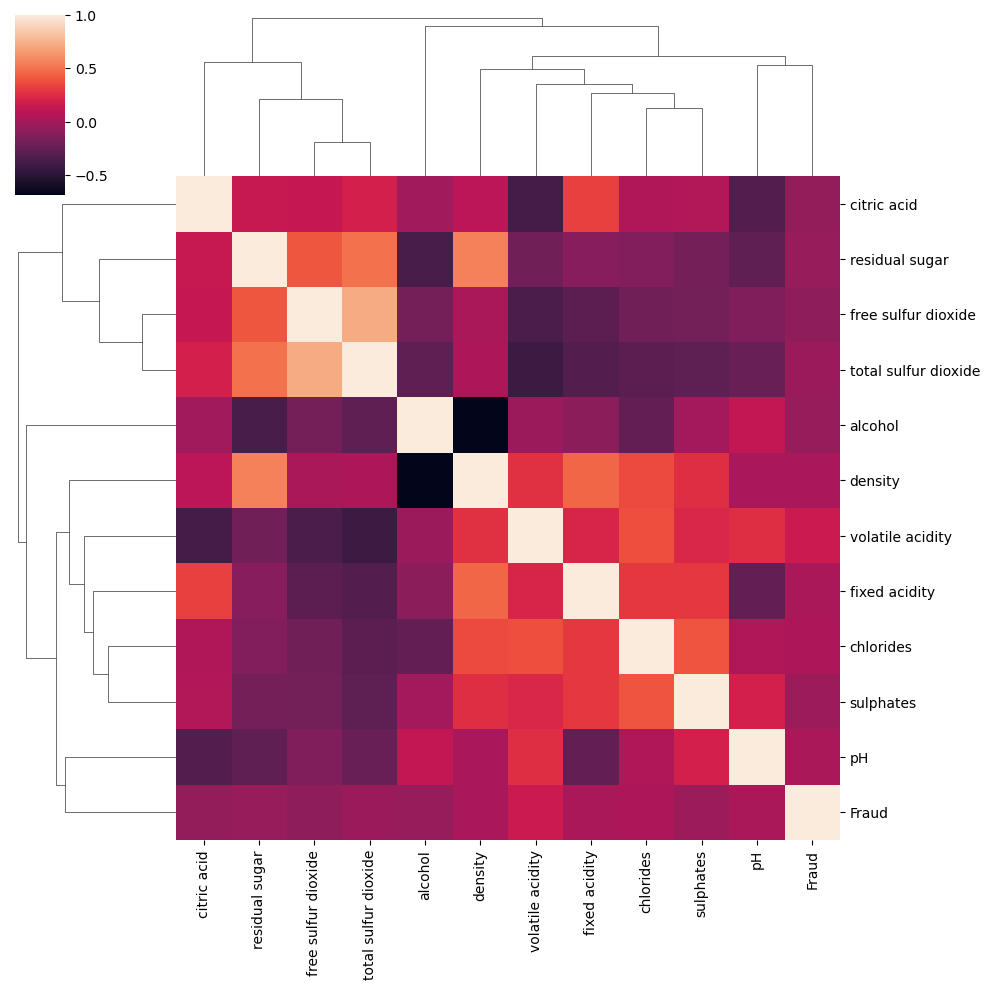

In [29]:
sns.clustermap(df.corr(numeric_only=True))

In [30]:
# Dropping Fraud column made above as there is already a quality column

In [31]:
df = df.drop('Fraud',axis=1)

----
## Machine Learning Model

Converting the categorical column "type" from a string "red" or "white" to dummy variables.

In [32]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [33]:
X = df.drop('quality',axis=1)
y = df['quality']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Since this is an unbalanced dataset, can explore hyperparameters to tune for this

In [40]:
# Consider class_weight 
# If not given, all classes are supposed to have weight one. 
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(class_weight='balanced')

In [43]:
# Creating a GridSearch for best parameters

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma': ['scale', 'auto']}

In [46]:
grid = GridSearchCV(svc,param_grid)

In [47]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [48]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

**Analysing Results**

In [49]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [50]:
grid_preds = grid.predict(scaled_X_test)

In [51]:
confusion_matrix(y_test,grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [52]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



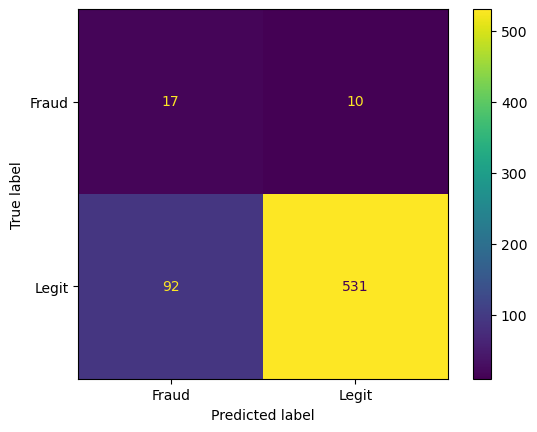

In [53]:
cm = confusion_matrix(y_test,grid_preds,labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.classes_)
disp.plot()

In [54]:
# For 109 instances when model is predicting wine as Fraud, 92 times it is Legit and only 17 times it is Fraud.

In [55]:
# From classification report, it can be seen that precision and recall for Fraud is quite poor.
# Pretty good as far as Legit wines are concerned.

# The true purpose of the project is to identify Fraud wines.
# Basically, the 10 wines that were Fraud but were predicted as Legit.

In [56]:
# Can try other ML algorithms

# It can be that chemical analysis may not be the optimum differentiator between Fraud and Legit wines.
# Other features beyond chemical analysis should be considered.
# Eg - label analysis; point of purchase ,etc.